In [89]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

label_set = lambda ax,labels: [ax.set_xlabel(labels[0]),ax.set_ylabel(labels[1])]


def f_transform(fun,f,lim = None):
    operator_e = lambda w,t:cos(w*t)
    operator_o = lambda w,t:sin(w*t)
    if lim == None:
        even = integrate.quad(lambda t:fun(t)*operator_e(f,t),-np.inf,np.inf)[0]
        odd = integrate.quad(lambda t:fun(t)*operator_o(f,t),-np.inf,np.inf)[0]
    else:
        even = integrate.quad(lambda t:fun(t)*operator_e(f,t),lim[0],lim[1])[0]
        odd = integrate.quad(lambda t:fun(t)*operator_o(f,t),lim[0],lim[1])[0]        
    return 1/(sqrt(2*pi))*(even - 1j*odd)
#test_f2 = lambda t: np.exp(t) if abs(t)<2 else 0

#fig,ax = plot(lambda x:f1(x,b),x,F1,w)

def plot(f,t,F,w):
    fig,ax = plt.subplots(2,1)
    
    #ax[0].plot(t,list(map(lambda t: f,t)))
    ax[0].plot(t,[f(i) for i in t])
    ax[1].plot(w,F.real,label = 'real')
    ax[1].plot(w,F.imag,label = 'imag')
    
    ax[1].legend()
    label_set(ax[0],['x','magnitude'])
    label_set(ax[1],['w','magnitude'])
    #ax[0].set_label(ax[1].set_xlabel('frequency w')
    fig.tight_layout(pad = 1.5)
    #ax[0].set_title('Fourier')
    #fig.suptitle("Fourier")
    
    return fig,ax

Text(0.5, 1.0, 'F(w) = $\\sqrt{\\frac{2}{\\pi}} \\frac{\\sin{(b/w)}}{w}$')

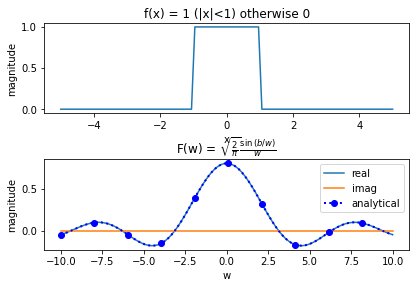

In [90]:

f1 = lambda t,b: 1 if abs(t)<b else 0
a1 = lambda w,b: sqrt(2/pi)*sin(b*w)/w
b = 1

x = np.linspace(-5,5,100)
w = np.linspace(-10,10,100)

F1 = np.array([f_transform(lambda t:f1(t,b),i) for i in w])
fig,ax = plot(lambda x:f1(x,b),x,F1,w)
ax[1].plot(w,np.array(list(map(lambda w:a1(w,b),w))).real,'bo',linestyle = 'dotted',lw = 2,label = 'analytical',markevery = 10)
ax[1].legend()
ax[0].set_title(r'f(x) = 1 (|x|<1) otherwise 0')
#ax[1].set_title(r'F(w) = $\sqrt{\frac{2}{\pi}} \frac{\sin{(b/w)}}{w}$')

Text(0.5, 1.0, 'f(x) = 1 (1<x<2) otherwise 0')

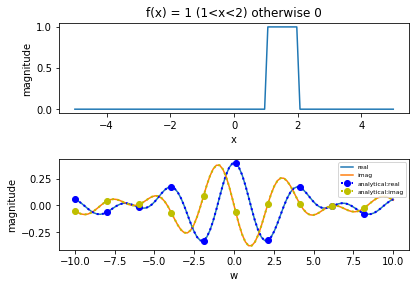

In [91]:


f2 = lambda t,b,c: 1 if b<t<c else 0
a2 = lambda w,b,c: (np.exp(-1j*b*w) - np.exp(-1j*c*w))/(1j*w*sqrt(2*pi))

#a1 = lambda w,b: sqrt(2/pi)*sin(b*w)/w
b = 1
c = 2

x = np.linspace(-5,5,100)
w = np.linspace(-10,10,100)

F2 = np.array([f_transform(lambda t:f2(t,b,c),i) for i in w])
#F1 = np.array([f_transform(lambda t:f1(t,b),i) for i in w])
fig,ax = plot(lambda x:f2(x,b,c),x,F2,w)
ax[1].plot(w,np.array(list(map(lambda w:a2(w,b,c),w))).real,'bo',linestyle = 'dotted',lw = 2,label = 'analytical:real',markevery = 10)
ax[1].plot(w,np.array(list(map(lambda w:a2(w,b,c),w))).imag,'yo',linestyle = 'dotted',lw = 2,label = 'analytical:imag',markevery = 10)
ax[1].legend(loc = 'upper right',fontsize = 6)
ax[0].set_title(r'f(x) = 1 (1<x<2) otherwise 0')


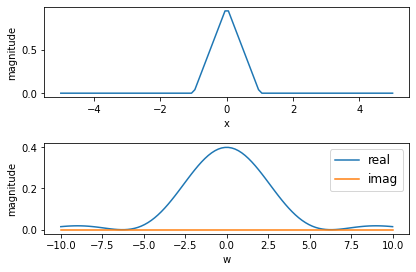

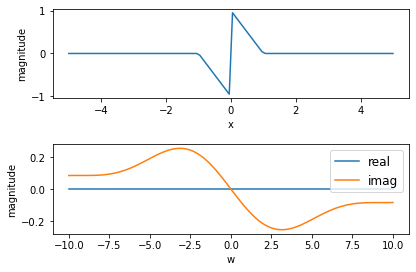

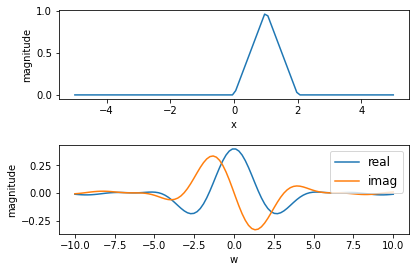

In [92]:

f3_1 = lambda x: x+1 if(-1<x<0) else -x + 1 if(0<x<1) else 0
F3_1 = np.array([f_transform(lambda t:f3_1(t),i) for i in w])
#F1 = np.array([f_transform(lambda t:f1(t,b),i) for i in w])
fig,ax = plot(lambda x:f3_1(x),x,F3_1,w)
ax[1].legend(loc = 'upper right',fontsize = 12)


f3_2 = lambda x: -x-1 if(-1<x<0) else -x + 1 if(0<x<1) else 0
F3_2 = np.array([f_transform(lambda t:f3_2(t),i) for i in w])
#F1 = np.array([f_transform(lambda t:f1(t,b),i) for i in w])
fig,ax = plot(lambda x:f3_2(x),x,F3_2,w)
ax[1].legend(loc = 'upper right',fontsize = 12)


f3_3 = lambda x: x if(0<x<1) else -x + 2 if(1<x<2) else 0
F3_3 = np.array([f_transform(lambda t:f3_3(t),i) for i in w])
#F1 = np.array([f_transform(lambda t:f1(t,b),i) for i in w])
fig,ax = plot(lambda x:f3_3(x),x,F3_3,w)
ax[1].legend(loc = 'upper right',fontsize = 12)

Text(0.5, 1.0, '$f(x) = \\frac{1}{x^2 + a^2}$')

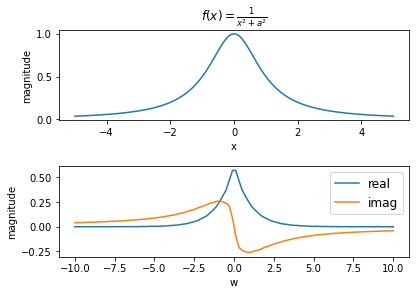

In [96]:
f4 = lambda x,a: 1/(x**2 + a**2) 
a = 1
F4 = np.array([f_transform(lambda t:f4(t,a),i,lim = [0,10]) for i in w])
#F1 = np.array([f_transform(lambda t:f1(t,b),i) for i in w])
fig,ax = plot(lambda x:f4(x,a),x,F4,w)
ax[1].legend(loc = 'upper right',fontsize = 12)
ax[0].set_title(r'$f(x) = \frac{1}{x^2 + a^2}$')


Text(0.5, 1.0, '$\\exp{(-ax^2)}$ (x>0) otherwise 0')

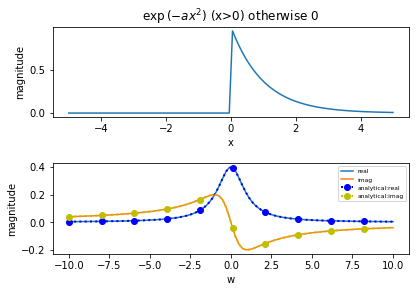

In [98]:

f5 = lambda x,a: np.exp(-a*x) if x>0 else 0  
a = 1
a5 = lambda w,a: 1/(sqrt(2*pi)*(a + 1j*w))
F5 = np.array([f_transform(lambda t:f5(t,a),i,lim = [0,10]) for i in w])
#F1 = np.array([f_transform(lambda t:f1(t,b),i) for i in w])
fig,ax = plot(lambda x:f5(x,a),x,F5,w)
ax[1].plot(w,np.array(list(map(lambda w:a5(w,a),w))).real,'bo',linestyle = 'dotted',lw = 2,label = 'analytical:real',markevery = 10)
ax[1].plot(w,np.array(list(map(lambda w:a5(w,a),w))).imag,'yo',linestyle = 'dotted',lw = 2,label = 'analytical:imag',markevery = 10)
ax[1].legend(loc = 'upper right',fontsize = 6)
ax[0].set_title('$\exp{(-ax^2)}$ (x>0) otherwise 0')


Text(0.5, 1.0, '$\\exp{(-ax^2)}$')

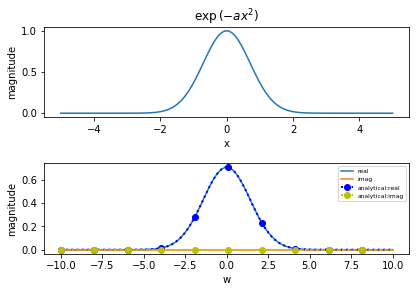

In [100]:


f6 = lambda x,a: np.exp(-a*x**2)    
a = 1
a6 = lambda w,a: 1/sqrt(2*a)*np.exp(-w**2/4/a)
F6 = np.array([f_transform(lambda t:f6(t,a),i,lim = [-10,10]) for i in w])
#F1 = np.array([f_transform(lambda t:f1(t,b),i) for i in w])
fig,ax = plot(lambda x:f6(x,a),x,F6,w)
ax[1].plot(w,np.array(list(map(lambda w:a6(w,a),w))).real,'bo',linestyle = 'dotted',lw = 2,label = 'analytical:real',markevery = 10)
ax[1].plot(w,np.array(list(map(lambda w:a6(w,a),w))).imag,'yo',linestyle = 'dotted',lw = 2,label = 'analytical:imag',markevery = 10)
ax[1].legend(loc = 'upper right',fontsize = 6)
ax[0].set_title(r'$\exp{(-ax^2)}$')
